In [1]:
# set up
import pandas as pd
import numpy as np
import pickle
import time 
import os
import matplotlib.pyplot as plt
import datetime
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pylab import *
from matplotlib.font_manager import FontProperties  
data_folder_path = 'C:\\Users\\goodluck\\Desktop\\DB'
raw_data_path =  "C:\\Users\\goodluck\\Desktop\\DB\\raw_data"
storage_path =  "C:\\Users\\goodluck\\Desktop\\DB\\database_storage"
DTBS_path = os.path.join(storage_path, "DTBS.pkl")
font = FontProperties(fname=r"simsun.ttf", size=14)  
matplotlib.rcParams['axes.unicode_minus'] =False
mpl.rcParams['font.sans-serif'] = ['SimHei']
tick_spacing = 4

# re-open
with open(DTBS_path, 'rb') as f:  
    DTBS = pickle.load(f)
    
def takeSecond(elem):
    return elem[1]


def retrieve_low_nodes(codes,dt,num):
    dl_rank = []
    for code in codes:
        if DTBS['A'][code][dt]['dl'] != 999:
            dl_rank.append((code, DTBS['A'][code][dt]['dl']))
    
    dl_rank.sort(key=takeSecond)
    low = dl_rank[0:num]
    return [i[0] for i in low]

def past_qs(days, code):
    
    for day in days:
            
        if DTBS['A'][code][day]['qs'] == 1:
            return 1
    
    return 0

def select_condition(codes, dt, fcd):
    satisfy = []
    if fcd[0] == 'lp':
        lm = calculate_time(dt, 'p', 20)
        
        for code in codes:
            if low_prc(code, dt, lm, fcd[1]):
                satisfy.append(code)
        
    else:
        for code in codes:
            if DTBS['A'][code][dt][fcd[0]] <= fcd[2] and DTBS['A'][code][dt][fcd[0]] >= fcd[1]:
                satisfy.append(code)
                    
    return satisfy

def rank(codes, dt, idx, num, d):
    rk = []
    if num == -1:
        num = len(codes)
    for code in codes:
        if idx == 'lp':
            if not np.isnan(DTBS['A'][code][dt]['dp']):
                lm = calculate_time(dt, 'p', 20)
                prc = get_prcs(code, lm)
                lp = absolute_low(prc, 0)
                rk.append((code, DTBS['A'][code][dt]['dp']/lp))
            
            
        elif idx != 'dl':
            if not np.isnan(DTBS['A'][code][dt][idx]):
                rk.append((code, DTBS['A'][code][dt][idx]))
        else:
            if not np.isnan(DTBS['A'][code][dt][idx]):
                if DTBS['A'][code][dt][idx] != 999:
                    rk.append((code, DTBS['A'][code][dt][idx]))
    if num >= len(rk):
        num = len(rk)
        
     
#     reverse = True 降序
    if d == 'd':
        rk.sort(key=takeSecond, reverse = True)
    else:
        rk.sort(key=takeSecond, reverse = False)

    if idx == 'lp':
        lp = [i for i in rk if i[1] == 1.0]
        ot = []
        if num - len(lp) > 0:
            ot = rk[len(lp):num]
        
        low = lp + ot
        
    else:    
        low = rk[0:num]
#     print("In",dt , len(low), "of", len(codes),  "is selected")   

#     print(low) 
    
    
    return [i[0] for i in low]
  

def get_prcs(code, dts):
    prc = []
    for dt in dts:
        prc.append(DTBS['A'][code][dt]['dp'])
    prc.sort()
    return prc
    
def relative_low(lst, pos):
    return np.quantile(a=lst, q = pos)
    
def absolute_low(lst, pos):
    return min(lst) + pos * (max(lst) - min(lst))

def low_prc(code, dt, lm, pos):
    prc = get_prcs(code, lm)
#     lp = min([relative_low(prc, pos), absolute_low(prc, pos)])
    lp = absolute_low(prc, pos)
    tp = DTBS['A'][code][dt]['dp']
#     if (tp <= lp):
#         print(code, tp, lp)
#     if tp <= lp:
#         print(tp, lp)
    return tp <= lp

def calculate_time(dt, d, l):
    time = []
    days = DTBS['D']['day']
    if d == 'p':
        for i in range(len(days)):
            if days[i] == dt:
                break
                
    return days[i-l+1:i+1]

In [105]:
# save
f_save = open(DTBS_path, 'wb')
pickle.dump(DTBS, f_save)
f_save.close()



In [103]:
codes = ['123187.SZ',
'123189.SZ',
'127081.SZ',
'123188.SZ',
'123190.SZ',
'127083.SZ'
]
cat1 = ['汽车(2021)',
'农林牧渔(2021)',
'建筑材料(2021)',
'美容护理(2021)',
'电力设备(2021)',
'建筑装饰(2021)'
]
cat2 = ['汽车零部件(2021)',
'养殖业(2021)',
'装修建材(2021)',
'化妆品(2021)',
'电池(2021)',
'基础建设(2021)'
]
for i in range(6):
    DTBS['B'][codes[i]]['cat1'] = cat1[i]
    DTBS['B'][codes[i]]['cat2'] = cat2[i]

In [104]:
for code in DTBS['A'].keys():
    print(code, DTBS['B'][code]['cat1'])

110088.SH 煤炭(2021)
113545.SH 煤炭(2021)
113631.SH 公用事业(2021)
123128.SZ 公用事业(2021)
123156.SZ 石油石化(2021)
127027.SZ 煤炭(2021)
127061.SZ 煤炭(2021)
110047.SH 轻工制造(2021)
110063.SH 轻工制造(2021)
110070.SH 钢铁(2021)
110087.SH 基础化工(2021)
110089.SH 基础化工(2021)
110092.SH 基础化工(2021)
111001.SH 建筑材料(2021)
111002.SH 轻工制造(2021)
111003.SH 基础化工(2021)
111007.SH 基础化工(2021)
111012.SH 基础化工(2021)
113025.SH 有色金属(2021)
113027.SH 有色金属(2021)
113046.SH 有色金属(2021)
113047.SH 建筑材料(2021)
113058.SH 钢铁(2021)
113059.SH 电力设备(2021)
113064.SH 基础化工(2021)
113534.SH 有色金属(2021)
113535.SH 机械设备(2021)
113566.SH 轻工制造(2021)
113591.SH 轻工制造(2021)
113600.SH 有色金属(2021)
113615.SH 建筑装饰(2021)
113621.SH 基础化工(2021)
113623.SH 基础化工(2021)
113632.SH 轻工制造(2021)
113636.SH 钢铁(2021)
113638.SH 纺织服饰(2021)
113640.SH 基础化工(2021)
113641.SH 有色金属(2021)
113649.SH 基础化工(2021)
113650.SH 基础化工(2021)
113653.SH 基础化工(2021)
113657.SH 建筑材料(2021)
113663.SH 基础化工(2021)
118000.SH 电力设备(2021)
118005.SH 电力设备(2021)
118006.SH 基础化工(2021)
118008.SH 电力设备(2021)
118010.SH 医药生物(2021)
118018

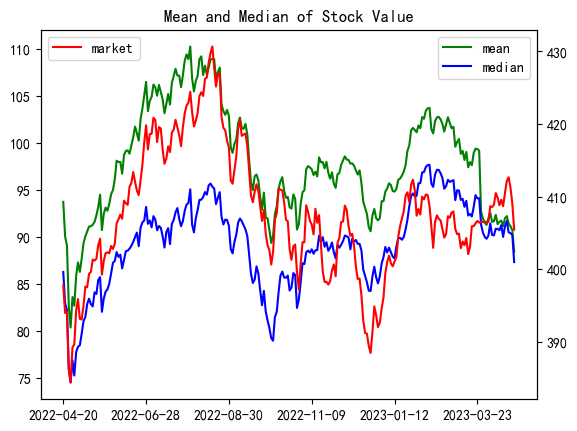

In [3]:
dts = DTBS['D']['day'][1286:]
zz = []
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
    
all_mean = []
all_median = []
for dt in dts:
    c = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
#             c.append(DTBS['A'][code][dt]['cpr'])
            c.append((100.0/DTBS['A'][code][dt]['csp'])*DTBS['E'][DTBS['B'][code]['sc']][dt]['cl'])
    
    all_mean.append(np.mean(c))
    all_median.append(np.median(c))
    
tick_spacing = 45
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean, c = 'g', label = 'mean')
ax1.plot(dts, all_median, c = 'b', label = 'median')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'r', label = 'market')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('Mean and Median of Stock Value')
plt.show()

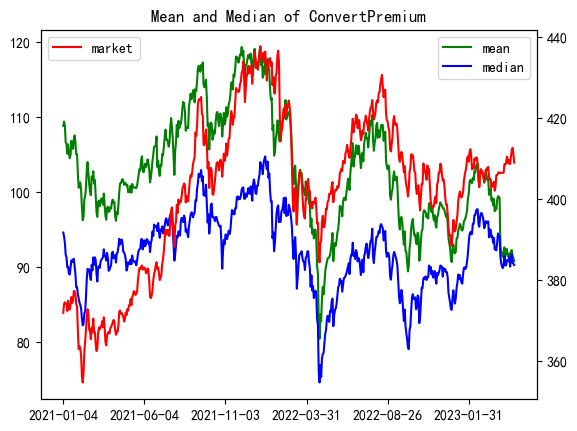

In [17]:
dts = DTBS['D']['day'][974:]
all_mean = []
all_median = []
zz = []
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
for dt in dts:
    c = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            
#             c.append(DTBS['A'][code][dt]['cpr'])
            c.append((100.0/DTBS['A'][code][dt]['csp'])*DTBS['E'][DTBS['B'][code]['sc']][dt]['cl'])
    
    all_mean.append(np.mean(c))
    all_median.append(np.median(c))
    
tick_spacing = 100
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean, c = 'g', label = 'mean')
ax1.plot(dts, all_median, c = 'b', label = 'median')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'r', label = 'market')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('Mean and Median of ConvertPremium')
plt.show()

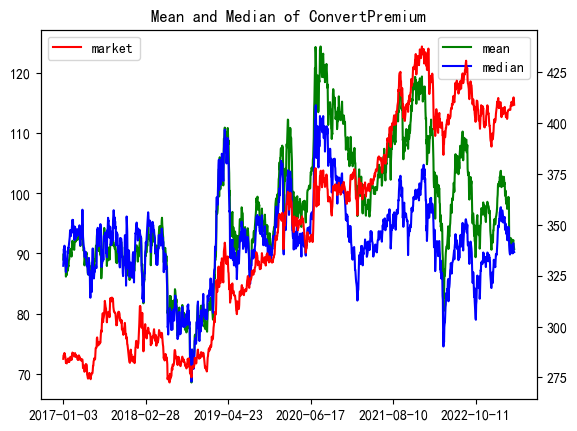

In [18]:
dts = DTBS['D']['day']
all_mean = []
all_median = []
zz = []
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
for dt in dts:
    c = []
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
#             c.append(DTBS['A'][code][dt]['cpr'])
            c.append((100.0/DTBS['A'][code][dt]['csp'])*DTBS['E'][DTBS['B'][code]['sc']][dt]['cl'])
    
    all_mean.append(np.mean(c))
    all_median.append(np.median(c))

tick_spacing = 280
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean, c = 'g', label = 'mean')
ax1.plot(dts, all_median, c = 'b', label = 'median')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'r', label = 'market')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('Mean and Median of ConvertPremium')
plt.show()

In [8]:
# import seaborn as sns
# plt.figure(dpi=100)
# sns.boxplot(y=c,#传入一组数据
#             orient='v'#箱子垂直显示，默认为'h'水平显示
#            )
# plt.show()

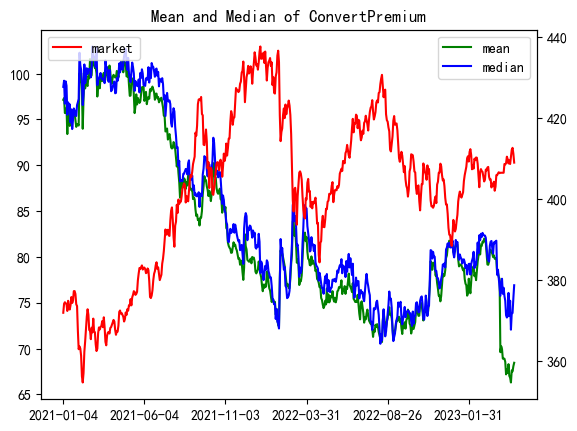

In [23]:
dts = DTBS['D']['day'][974:]
all_mean = []
all_median = []
pm = []
zz = []

for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
for dt in dts:
    c = []
    d = []
    for code in DTBS['A'].keys():
        
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['A'][code][dt]['dp'] < 130 and  DTBS['A'][code][dt]['dp'] > 120:
#                 c.append(DTBS['A'][code][dt]['cpr'])
                c.append((100.0/DTBS['A'][code][dt]['csp'])*DTBS['E'][DTBS['B'][code]['sc']][dt]['cl'])
                d.append(DTBS['A'][code][dt]['dp'])
    
    all_mean.append(np.mean(c))
    all_median.append(np.median(c))
    pm.append(np.mean(d))
tick_spacing = 100
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean, c = 'g', label = 'mean')
ax1.plot(dts, all_median, c = 'b', label = 'median')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'r', label = 'market')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('Mean and Median of ConvertPremium')
plt.show()

110-130 平价

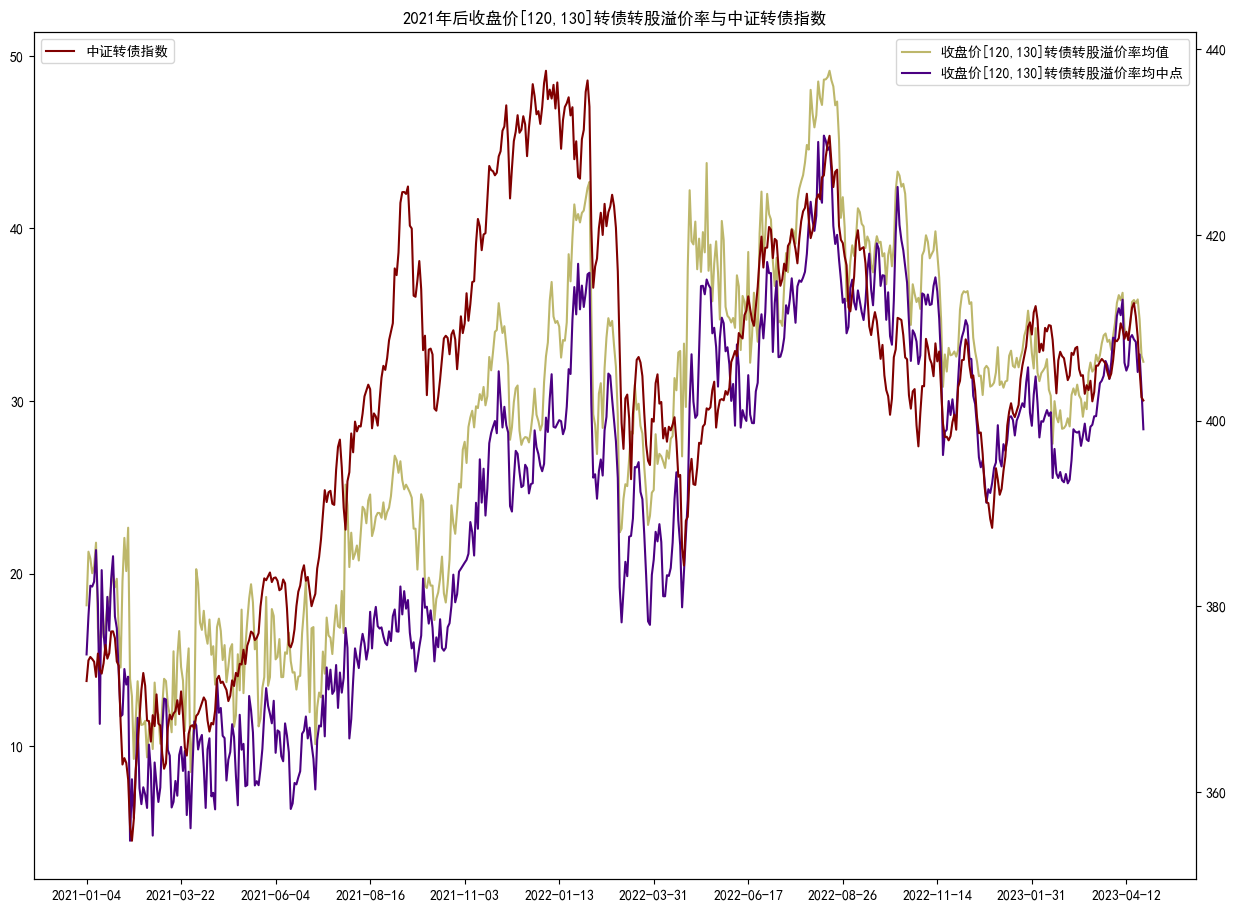

In [90]:
dts = DTBS['D']['day'][974:]
all_mean = []
all_median = []
# pm = []
zz = []

for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
for dt in dts:
    c = []
    d = []
    for code in DTBS['A'].keys():
        
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['A'][code][dt]['dp'] < 130 and  DTBS['A'][code][dt]['dp'] > 120:
                c.append(DTBS['A'][code][dt]['cpr'])
#                 d.append(DTBS['A'][code][dt]['dp'])
    
    all_mean.append(np.mean(c))
    all_median.append(np.median(c))
#     pm.append(np.mean(d))
tick_spacing = 50
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean, c = 'darkkhaki', label = '收盘价[120,130]转债转股溢价率均值')
ax1.plot(dts, all_median, c = 'indigo', label = '收盘价[120,130]转债转股溢价率均中点')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'maroon', label = '中证转债指数')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('2021年后收盘价[120,130]转债转股溢价率与中证转债指数')
plt.savefig('2021年后收盘价[120,130]转债转股溢价率与中证转债指数', dpi=300)
plt.show()

In [106]:
DTBS['D']['day'][1217]

'2022-01-04'

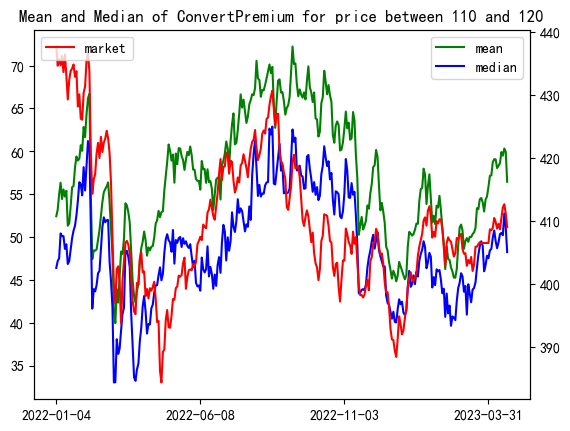

In [21]:
dts = DTBS['D']['day'][1217:]
all_mean = []
all_median = []
pm = []
zz = []

for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
for dt in dts:
    c = []
    d = []
    for code in DTBS['A'].keys():
        
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['A'][code][dt]['dp'] < 120 and  DTBS['A'][code][dt]['dp'] > 110:
                c.append(DTBS['A'][code][dt]['cpr'])
                d.append(DTBS['A'][code][dt]['dp'])
    
    all_mean.append(np.mean(c))
    all_median.append(np.median(c))
    pm.append(np.mean(d))
tick_spacing = 100
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean, c = 'g', label = 'mean')
ax1.plot(dts, all_median, c = 'b', label = 'median')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'r', label = 'market')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('Mean and Median of ConvertPremium for price between 110 and 120')
plt.show()

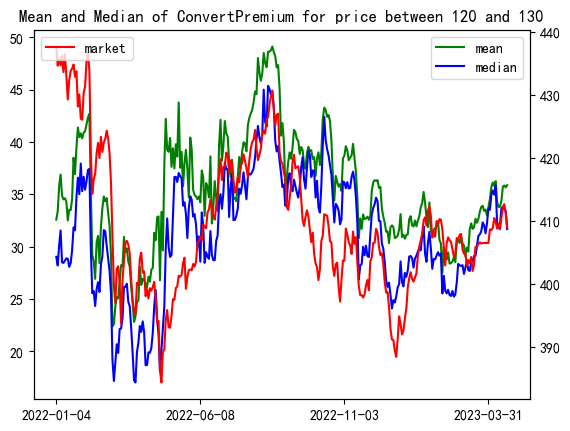

In [22]:
dts = DTBS['D']['day'][1217:]
all_mean = []
all_median = []
pm = []
zz = []

for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
for dt in dts:
    c = []
    d = []
    for code in DTBS['A'].keys():
        
        if DTBS['A'][code][dt]['ia'] == 1:
            if DTBS['A'][code][dt]['dp'] < 130 and  DTBS['A'][code][dt]['dp'] > 120:
                c.append(DTBS['A'][code][dt]['cpr'])
                d.append(DTBS['A'][code][dt]['dp'])
    
    all_mean.append(np.mean(c))
    all_median.append(np.median(c))
    pm.append(np.mean(d))
tick_spacing = 100
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, all_mean, c = 'g', label = 'mean')
ax1.plot(dts, all_median, c = 'b', label = 'median')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'r', label = 'market')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('Mean and Median of ConvertPremium for price between 120 and 130')
plt.show()

In [59]:
cat1 = []
for cd in DTBS['A'].keys():
    cat1.append(DTBS['B'][cd]['cat1'])
    print(cd, DTBS['B'][cd]['cat1'])
    
cat1 = set(cat1)
cat1

110088.SH 煤炭(2021)
113545.SH 煤炭(2021)
113631.SH 公用事业(2021)
123128.SZ 公用事业(2021)
123156.SZ 石油石化(2021)
127027.SZ 煤炭(2021)
127061.SZ 煤炭(2021)
110047.SH 轻工制造(2021)
110063.SH 轻工制造(2021)
110070.SH 钢铁(2021)
110087.SH 基础化工(2021)
110089.SH 基础化工(2021)
110092.SH 基础化工(2021)
111001.SH 建筑材料(2021)
111002.SH 轻工制造(2021)
111003.SH 基础化工(2021)
111007.SH 基础化工(2021)
111012.SH 基础化工(2021)
113025.SH 有色金属(2021)
113027.SH 有色金属(2021)
113046.SH 有色金属(2021)
113047.SH 建筑材料(2021)
113058.SH 钢铁(2021)
113059.SH 电力设备(2021)
113064.SH 基础化工(2021)
113534.SH 有色金属(2021)
113535.SH 机械设备(2021)
113566.SH 轻工制造(2021)
113591.SH 轻工制造(2021)
113600.SH 有色金属(2021)
113615.SH 建筑装饰(2021)
113621.SH 基础化工(2021)
113623.SH 基础化工(2021)
113632.SH 轻工制造(2021)
113636.SH 钢铁(2021)
113638.SH 纺织服饰(2021)
113640.SH 基础化工(2021)
113641.SH 有色金属(2021)
113649.SH 基础化工(2021)
113650.SH 基础化工(2021)
113653.SH 基础化工(2021)
113657.SH 建筑材料(2021)
113663.SH 基础化工(2021)
118000.SH 电力设备(2021)
118005.SH 电力设备(2021)
118006.SH 基础化工(2021)
118008.SH 电力设备(2021)
118010.SH 医药生物(2021)
118018

{'交通运输(2021)',
 '传媒(2021)',
 '公用事业(2021)',
 '农林牧渔(2021)',
 '医药生物(2021)',
 '商贸零售(2021)',
 '国防军工(2021)',
 '基础化工(2021)',
 '家用电器(2021)',
 '建筑材料(2021)',
 '建筑装饰(2021)',
 '房地产(2021)',
 '有色金属(2021)',
 '机械设备(2021)',
 '汽车(2021)',
 '煤炭(2021)',
 '环保(2021)',
 '电力设备(2021)',
 '电子(2021)',
 '石油石化(2021)',
 '社会服务(2021)',
 '纺织服饰(2021)',
 '美容护理(2021)',
 '计算机(2021)',
 '轻工制造(2021)',
 '通信(2021)',
 '钢铁(2021)',
 '银行(2021)',
 '非银金融(2021)',
 '食品饮料(2021)'}

In [111]:
ttl = 0
dt = DTBS['D']['day'][-1]
for cd in DTBS['A'].keys():
    if DTBS['A'][cd][dt]['ia']:
        ttl += DTBS['A'][cd][dt]['bl']
    
print(ttl)
re = []
for c in cat1:
    s = 0
    for cd in DTBS['A'].keys():
        if DTBS['A'][cd][dt]['ia']:
            if DTBS['B'][cd]['cat1'] == c:
                s += DTBS['A'][cd][dt]['bl']
                
    re.append(s)
    
    
    

8326.794999999998


In [113]:
for i in re:
    print(i)

0
182.735
354.59799999999996
699.559
110.738
296.95000000000005
148.624
84.78099999999999
349.407
476.936
64.32
470.311
30.445
2678.5299999999993
3.468
343.26
47.587
134.365
162.618
49.564
124.225
7.508
169.17100000000002
213.60999999999999
240.339
66.36699999999999
227.97199999999998
100.497
411.6859999999999
76.624


In [110]:
DTBS['D']['day'][-1]

'2023-04-21'

In [91]:
dts = DTBS['D']['day'][974:]
# dts = DTBS['D']['day']
zz = []
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
    
r = [[],[],[],[],[]]
for dt in dts:
    c = [[],[],[],[],[]]
    for code in DTBS['A'].keys():
        if DTBS['A'][code][dt]['ia'] == 1:
            
#             c.append(DTBS['A'][code][dt]['cpr'])
#             if DTBS['A'][code][dt]['dp'] < 130 and  DTBS['A'][code][dt]['dp'] > 120:
#                 c.append((code, DTBS['A'][code][dt]['cpr']))
            re = (100.0/DTBS['A'][code][dt]['csp'])*(DTBS['E'][DTBS['B'][code]['sc']][dt]['cl'])
            if re >= 70.0 and re < 80.0:
                c[0].append(code)
            elif re >= 80.0 and re < 90.0:
                c[1].append(code)
            elif re >= 90.0 and re < 100.0:
                c[2].append(code)
            elif re >= 100.0 and re <110.0:
                c[3].append(code)
            elif re >= 110.0 and re < 120.0:
                c[4].append(code)         
                
    for i in range(5):
        lst = []
        for nm in c[i]:

            lst.append(DTBS['A'][nm][dt]['cpr'])
            
        if lst == []:
            r[i].append(np.nan)
            # r[i].append(r[i-1])
        else:
            r[i].append(round(np.median(lst),2))
            
            
        
            
        
# DTBS['B']['113577.SH']['sc']

#     if c == []:
#         print(dt, "No Candidate!!!")
#     else:
#         print(dt, 'min:', round(np.min(c),2), 'q1:',  round(np.quantile(a=c, q = 0.25),2), 'median:', round(np.median(c),2), 'q3:', round(np.quantile(a=c, q = 0.75),2),'max:', round( np.max(c),2))
#     if np.max(c) < 120:
#         print("cheap")


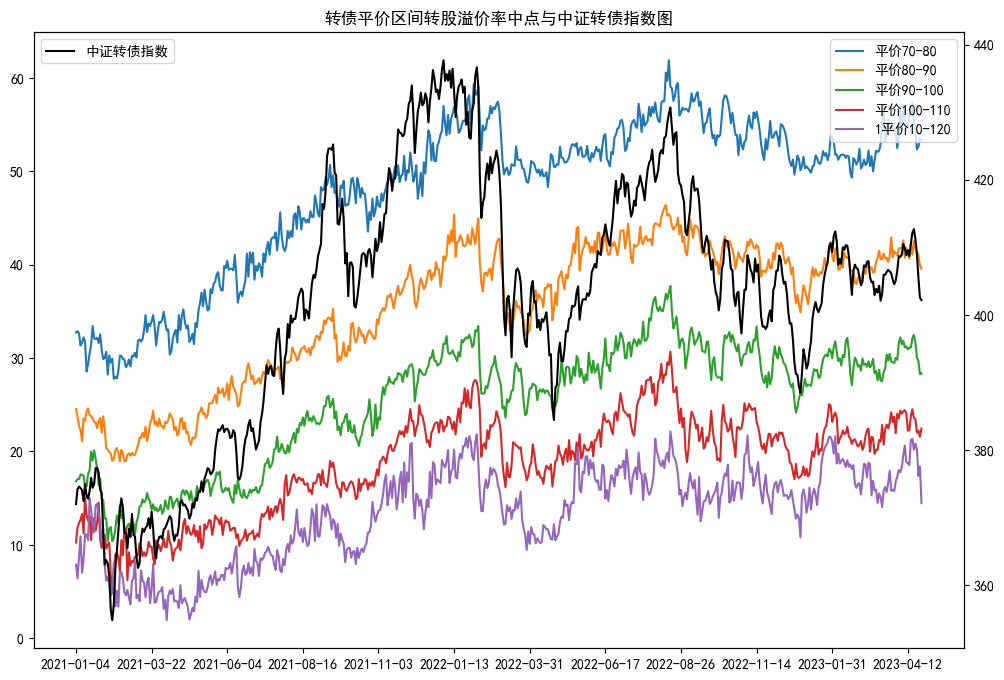

In [94]:
# def missing_plot(x, y):
#     x_n = x.copy()
#     y_n = y.copy()
#     for i in range(len(y_n)):
#         if y_n[i] == -999:
#             del x_n[i]
#             del y_n[i]
            
        
#     return x_n, y_n

plt.rcParams['figure.figsize'] = (12.0, 8.0) 


tick_spacing = 50
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dts, r[0], label = '平价70-80')
ax1.plot(dts, r[1],  label = '平价80-90')
ax1.plot(dts, r[2],   label = '平价90-100')
ax1.plot(dts, r[3],   label = '平价100-110')
ax1.plot(dts, r[4], label = '平价110-120')
ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(dts, zz, c = 'k', label = '中证转债指数')
ax2.legend(loc=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.title('转债平价区间转股溢价率中点与中证转债指数图')
plt.savefig('平价', dpi=300)
plt.show()

In [15]:
# cat1 = []
# for cd in DTBS['A'].keys():
#     cat1.append(DTBS['B'][cd]['cat1'])
    
# cat1 = set(cat1)
# cat1 = list(cat1)
cat1 = ['农林牧渔(2021)',
 '医药生物(2021)',
 '机械设备(2021)',
 '基础化工(2021)',
 '国防军工(2021)',
 '煤炭(2021)',
 '美容护理(2021)',
 '电子(2021)',
 '电力设备(2021)',
 '建筑材料(2021)',
 '环保(2021)',
 '非银金融(2021)',
 '石油石化(2021)',
 '社会服务(2021)',
 '轻工制造(2021)',
 '公用事业(2021)',
 '商贸零售(2021)',
 '传媒(2021)',
 '钢铁(2021)',
 '食品饮料(2021)',
 '有色金属(2021)',
 '交通运输(2021)',
 '银行(2021)',
 '建筑装饰(2021)',
 '汽车(2021)',
 '纺织服饰(2021)',
 '家用电器(2021)',
 '计算机(2021)',
 '通信(2021)']
print(len(cat1))

29


In [26]:
import matplotlib.colors as mcolors
print(mcolors.CSS4_COLORS.keys())

dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights

农林牧渔(2021)


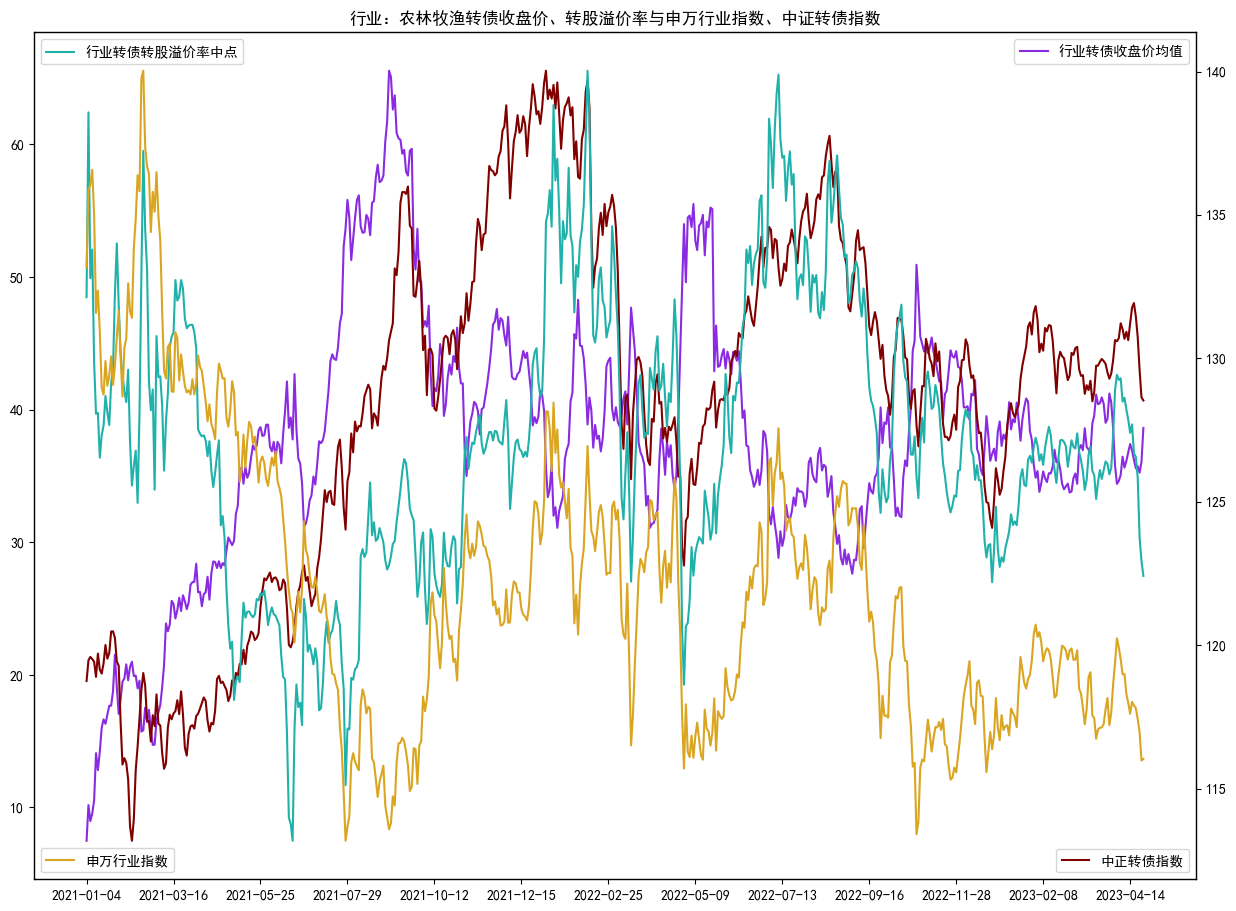

In [98]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = (20.0, 8.0) 
dts = DTBS['D']['day'][974:]
# dts = DTBS['D']['day']
zz = []

plt.rcParams['figure.figsize'] = (15, 11) 
for dt in dts:
    zz.append(DTBS['C']['zi'][dt])
tick_spacing = 46


for idt in cat1:
    all_median = []
    all_mean = []
    id_close = []
    count = 0
    for dt in dts:
        count+=1
        c = []
        d = []
        for code in DTBS['A'].keys():
            if DTBS['A'][code][dt]['ia'] == 1:
                
                if DTBS['B'][code]['cat1'] == idt:
                    c.append(DTBS['A'][code][dt]['cpr'])
                    d.append(DTBS['A'][code][dt]['dp'])
                    
        all_median.append(np.mean(c))  
        all_mean.append(np.mean(d))      
        id_close.append(float(sw_df.iloc[count][idt].replace(',','')))
    
    

    

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(dts, all_median, c = 'blueviolet',linestyle='solid', label = '行业转债收盘价均值')

    ax1.legend(loc=1)
    ax2 = ax1.twinx()
    ax2.plot(dts, zz, c = 'maroon', linestyle='solid',label = '中正转债指数')
    ax2.legend(loc=4)
    ax2.get_yaxis().set_visible(False) 
    ax3 = ax1.twinx()
    ax3.plot(dts, all_mean, c = 'lightseagreen',linestyle='solid', label = '行业转债转股溢价率中点')
    ax3.legend(loc=2)
    ax4 = ax1.twinx()
    ax4.plot(dts, id_close, c = 'goldenrod',linestyle='solid', label = '申万行业指数')
    ax4.legend(loc=3)
    ax4.get_yaxis().set_visible(False) 
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.title('行业：'+ idt[:-6] +'转债收盘价、转股溢价率与申万行业指数、中证转债指数')
    plt.savefig(idt[:-6], dpi=300)
    print(idt)
    if idt == '农林牧渔(2021)':
        break;
        
# plt.show()


In [54]:
sw_path =  os.path.join(raw_data_path, "sw_idid.CSV")

sw_df = pd.read_csv(sw_path,encoding='gb18030')
sw_df.set_index('Date',inplace=True)
sw_df.iloc[1]['传媒(2021)']
sw_df

,传媒(2021),计算机(2021),石油石化(2021),美容护理(2021),农林牧渔(2021),社会服务(2021),家用电器(2021),非银金融(2021),汽车(2021),通信(2021),...,建筑材料(2021),有色金属(2021),银行(2021),公用事业(2021),轻工制造(2021),环保(2021),钢铁(2021),国防军工(2021),纺织服饰(2021),建筑装饰(2021)
Date,,,,,,,,,,,,,,,,,,,,,
NaN,801760.SI,801750.SI,801960.SI,801980.SI,801010.SI,801210.SI,801110.SI,801790.SI,801880.SI,801770.SI,...,801710.SI,801050.SI,801780.SI,801160.SI,801140.SI,801970.SI,801040.SI,801740.SI,801130.SI,801720.SI
2021/1/4,739.31,"5,227.08","2,022.90","7,982.05","4,181.35","12,596.77","10,342.01","2,264.27","5,850.33","2,135.00",...,"7,960.53","4,316.77","3,627.68","2,009.08","2,646.52","1,900.78","2,280.27","1,886.35","1,776.69","1,923.51"
2021/1/5,732.01,"5,255.44","2,074.03","8,248.51","4,335.03","12,570.16","10,625.13","2,252.44","5,848.74","2,145.80",...,"7,962.07","4,353.32","3,583.58","1,981.37","2,677.63","1,880.98","2,271.26","1,900.57","1,760.96","1,920.58"
2021/1/6,727.7,"5,137.49","2,126.56","8,246.40","4,345.40","12,367.56","10,527.54","2,265.72","5,786.67","2,105.84",...,"8,172.99","4,373.19","3,672.97","1,993.89","2,669.07","1,863.86","2,279.15","1,930.72","1,754.03","1,932.75"
2021/1/7,708.61,"4,969.85","2,142.87","8,177.05","4,374.91","12,997.92","10,733.27","2,285.57","5,855.83","2,044.14",...,"8,130.85","4,537.46","3,713.91","1,961.69","2,645.28","1,812.56","2,325.36","1,963.24","1,704.00","1,886.72"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/4/19,753.11,"5,306.43","2,453.81","6,747.28","3,308.49","10,920.67","7,210.81","1,587.81","5,342.44","2,556.21",...,"6,141.91","5,169.78","3,221.27","2,271.64","2,345.45","1,822.90","2,427.19","1,529.58","1,603.96","2,396.44"
2023/4/20,787.05,"5,417.90","2,445.20","6,675.20","3,286.96","10,747.52","7,331.72","1,595.17","5,259.19","2,623.95",...,"6,072.47","5,061.75","3,213.75","2,266.04","2,325.97","1,801.06","2,397.45","1,519.79","1,594.27","2,433.74"
2023/4/21,751.16,"5,106.60","2,405.89","6,587.54","3,260.92","10,409.44","7,202.44","1,534.20","5,149.18","2,516.08",...,"5,967.28","4,943.16","3,173.80","2,234.77","2,280.99","1,768.78","2,351.11","1,520.55","1,573.81","2,382.14"


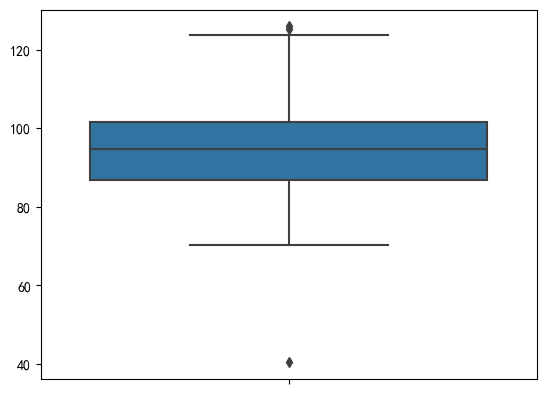

In [60]:
import seaborn as sns
plt.figure(dpi=100)
sns.boxplot(y=c,#传入一组数据
            orient='v'#箱子垂直显示，默认为'h'水平显示
           )
plt.show()

In [67]:
y = [-1,-2,-3]

In [68]:
del y[1]
y

[-1, -3]

<IPython.core.display.Javascript object>


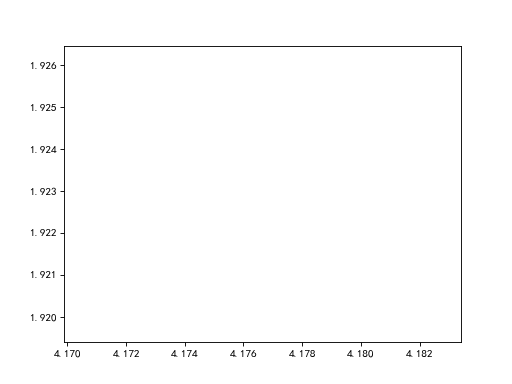

In [109]:
%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot([0,1,2,3,4],[2,2,np.nan,2,4])
plt.show()

In [16]:
m6 = []
for code in DTBS['B'].keys():
    if datetime.datetime.strptime(DTBS['B'][code]['ipo'], '%Y-%m-%d') >= datetime.datetime.strptime('2022-11-01', '%Y-%m-%d'):
        m6.append(code)
print(m6)
print(len(m6))

['110092.SH', '111007.SH', '111012.SH', '113064.SH', '113663.SH', '118020.SH', '118022.SH', '118023.SH', '118028.SH', '118029.SH', '123165.SZ', '123166.SZ', '123168.SZ', '123169.SZ', '127075.SZ', '127078.SZ', '110091.SH', '113664.SH', '113665.SH', '118025.SH', '118026.SH', '123162.SZ', '123163.SZ', '127072.SZ', '127074.SZ', '127077.SZ', '127079.SZ', '111008.SH', '111009.SH', '111011.SH', '113063.SH', '113659.SH', '113662.SH', '123174.SZ', '123172.SZ', '127076.SZ', '113660.SH', '123171.SZ', '113065.SH', '111010.SH', '113661.SH', '118021.SH', '118024.SH', '118027.SH', '118030.SH', '123164.SZ', '123167.SZ', '123170.SZ', '123173.SZ', '127080.SZ', '123175.SZ', '118031.SH', '113666.SH', '123176.SZ', '123178.SZ', '123177.SZ', '123179.SZ', '123180.SZ', '118032.SH', '113066.SH', '123181.SZ', '113667.SH', '118033.SH', '123182.SZ', '123184.SZ', '123183.SZ', '110093.SH', '123185.SZ', '127084.SZ', '123186.SZ', '123187.SZ', '123189.SZ', '127081.SZ', '123188.SZ', '123190.SZ', '127083.SZ', '113668.SH'

In [17]:
DTBS['B']['123164.SZ']

{'cn': '法本转债',
 'ipo': '2022-11-14',
 'sc': '300925.SZ',
 'sn': '法本信息',
 'cat1': '计算机(2021)',
 'cat2': '软件开发(2021)',
 'dld': '2046-01-01'}

In [ ]:
12月 14支
1月 9支
2月 6支
3月 9支
4月 27支

In [22]:
datetime.datetime.strptime('2022-02-27', '%Y-%m-%d')  >= (datetime.datetime.strptime('2023-04-27', '%Y-%m-%d') + datetime.timedelta(days=-180))

False